
Logistic Regression for Admission ..

Last Updated: February 16th, 2025

Daily Challenge: Logistic Regression for Admission Prediction



What you will learn

    Data visualization with scatter plots.
    Basic understanding of logistic regression.
    Applying a logistic regression model to binary classification.
    Interpreting the results of logistic regression.


What you will create

You will create a logistic regression model that uses examination scores to predict university admission.
dataset available here


Your Task

    Data Exploration: Load and visualize the data.
        Use pandas to load the dataset and examine the first few rows.
        Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

    Applying Logistic Regression with scikit-learn:
        Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
        Train the logistic regression model on your dataset.

    Making Predictions:
        Use the trained logistic regression model to make predictions on your dataset.
        Calculate the accuracy of your model.

    Model Evaluation:
        Interpret the result of logistic regression and the accuracy of your model.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay,
)

In [3]:
# Chargement brut
with open("ex2data1.csv", "r") as f:
    lines = f.readlines()

# Nettoyage manuel des guillemets et split des colonnes
cleaned_lines = [line.strip().replace('"', '') for line in lines]
data = [line.split(',') for line in cleaned_lines]

# Création du DataFrame
df = pd.DataFrame(data, columns=["Exam1", "Exam2", "Admitted"])

# Conversion en types numériques
df = df.astype({"Exam1": float, "Exam2": float, "Admitted": int})

# Affichage rapide
print(df.head())
print(df.info())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


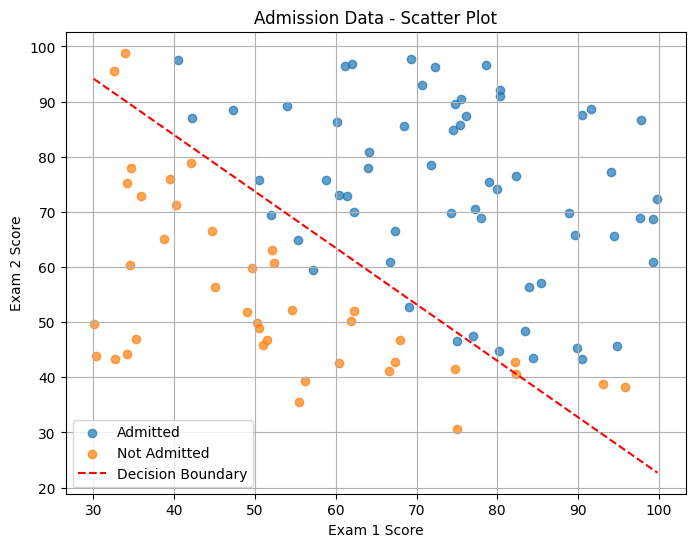

In [5]:
# Séparer les admis / non admis pour visualisation
admitted = df[df["Admitted"] == 1]
not_admitted = df[df["Admitted"] == 0]

# Définir X et y
X = df[["Exam1", "Exam2"]]
y = df["Admitted"]

# Entraîner le modèle si besoin
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admitted["Exam1"], admitted["Exam2"], label="Admitted", alpha=0.7)
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], label="Not Admitted", alpha=0.7)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Admission Data - Scatter Plot")
plt.grid(True)

# Tracer la frontière de décision
coef = model.coef_[0]
intercept = model.intercept_[0]
x_values = np.array([df["Exam1"].min(), df["Exam1"].max()])
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, color="red", linestyle="--", label="Decision Boundary")
plt.legend()
plt.show()

On sépare les données en deux groupes (Admitted == 1 et Admitted == 0).

On utilise plt.scatter() pour tracer les points dans un plan Exam1 vs Exam2.

Les couleurs (bleu pour admis, rouge pour non-admis) permettent de visualiser une frontière approximative de séparation.

In [11]:
# Définition des variables
X = df[["Exam1", "Exam2"]]
y = df["Admitted"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Création du modèle
model = LogisticRegression()

# Entraînement
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


    X contient les deux variables explicatives : les scores aux examens.

    y est la variable cible (0 = non admis, 1 = admis).

    On divise le jeu de données en 80% pour l’entraînement et 20% pour le test, avec stratify=y pour respecter la proportion admis/non-admis.

    model.fit() entraîne le modèle : il ajuste une fonction sigmoïde pour séparer les deux classes en trouvant les coefficients optimaux.

    modèle est entraîné



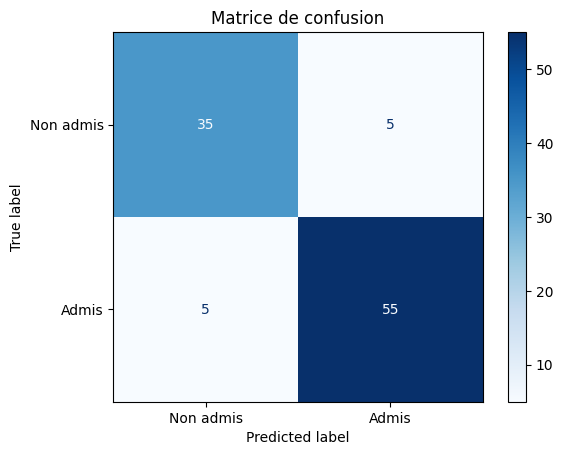

Rapport de classification :
              precision    recall  f1-score   support

   Non admis       0.88      0.88      0.88        40
       Admis       0.92      0.92      0.92        60

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

Précision globale : 0.9


In [14]:
# Matrice de confusion
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non admis", "Admis"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.grid(False)
plt.show()

# Métriques
print("Rapport de classification :")
print(classification_report(y, y_pred, target_names=["Non admis", "Admis"]))
print("Précision globale :", accuracy_score(y, y_pred))


    Non admis (0) : Sur toutes les prédictions "non admis", 88% étaient correctes.

    Admis (1) : Sur toutes les prédictions "admis", 92% étaient correctes.

    Non admis (0) : Sur tous les vrais "non admis", 88% ont été bien prédits.

    Admis (1) : Sur tous les vrais "admis", 92% ont été bien prédits.

    Moyenne entre précision et rappel, utile quand tu veux un équilibre entre les deux.


Type	Valeur
Accuracy	0.90
Macro average	0.90
Weighted avg	0.90

Accuracy (Précision globale) :

90% des prédictions sont correctes (sur les 100 personnes testées, 90 sont bien classées).

Macro average :

Moyenne simple entre les scores des deux classes. Intéressant si les classes sont équilibrées.

Weighted average :

Moyenne pondérée par le nombre de cas dans chaque classe. Utile quand tu as un déséquilibre dans les données (ce n’est pas le cas ici, car 60 vs 40 est assez raisonnable).

Le modèle :

Distingue bien entre admis et non admis.

Est équilibré : il ne favorise pas l’une ou l’autre classe.

Atteint 90% de précision, ce qui est très satisfaisant pour un modèle aussi simple et un jeu de données aussi petit.